In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Clean_Dataset.csv')
df

,Unnamed: 0,Fiyat (TL),Oda,Salon,Metrekare (m²),Bina Yaşı,Bulunduğu Kat
0,0,2950000,3,1,120,35,4
1,1,2950000,2,1,90,24,1
2,2,1650000,2,1,80,39,1
3,3,3850000,3,1,120,30,10
4,4,3290000,2,1,105,35,4
...,...,...,...,...,...,...,...
193,193,4890000,3,1,105,8,1
194,194,3250000,2,1,98,31,1
195,195,3950000,3,1,134,40,1
196,196,4500000,3,1,120,35,6


In [3]:
df = df.drop(columns='Unnamed: 0')
df

,Fiyat (TL),Oda,Salon,Metrekare (m²),Bina Yaşı,Bulunduğu Kat
0,2950000,3,1,120,35,4
1,2950000,2,1,90,24,1
2,1650000,2,1,80,39,1
3,3850000,3,1,120,30,10
4,3290000,2,1,105,35,4
...,...,...,...,...,...,...
193,4890000,3,1,105,8,1
194,3250000,2,1,98,31,1
195,3950000,3,1,134,40,1
196,4500000,3,1,120,35,6


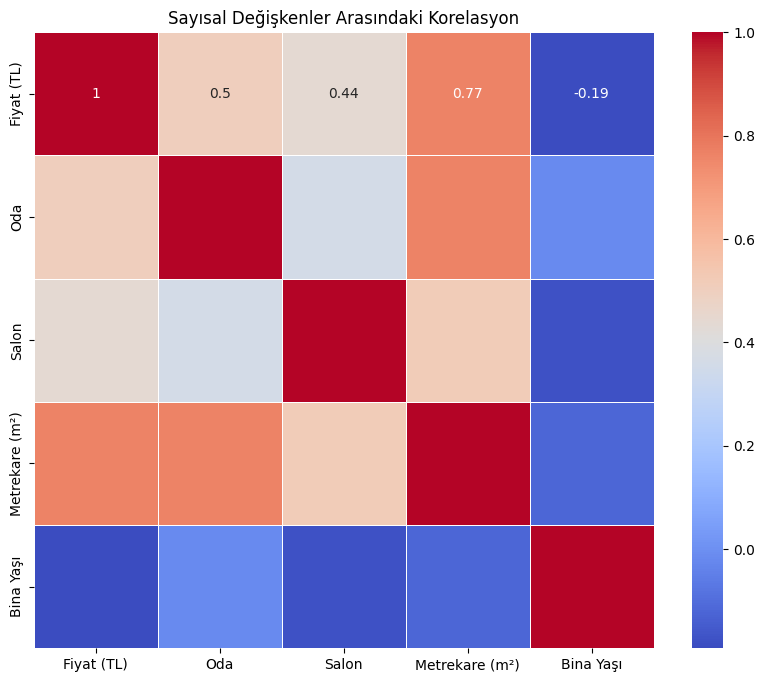

In [4]:
# Sayısal değişkenler arasındaki korelasyon
corr = df[['Fiyat (TL)', 'Oda', 'Salon', 'Metrekare (m²)', 'Bina Yaşı']].corr()

# Korelasyon ısısı haritası
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sayısal Değişkenler Arasındaki Korelasyon')
plt.show()


In [5]:
Features = ['Oda','Salon','Metrekare (m²)','Bina Yaşı','Bulunduğu Kat']
X= df[Features]
y= df['Fiyat (TL)']
df

,Fiyat (TL),Oda,Salon,Metrekare (m²),Bina Yaşı,Bulunduğu Kat
0,2950000,3,1,120,35,4
1,2950000,2,1,90,24,1
2,1650000,2,1,80,39,1
3,3850000,3,1,120,30,10
4,3290000,2,1,105,35,4
...,...,...,...,...,...,...
193,4890000,3,1,105,8,1
194,3250000,2,1,98,31,1
195,3950000,3,1,134,40,1
196,4500000,3,1,120,35,6


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestRegressor(n_estimators=200,max_depth=20,random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 745606.9955357143
MSE: 1019730630828.0
R²: 0.632463706040424
